# Generating FoGSM data

Max w 1e-5 jitter: 13x13

In [1]:
from fogsm import FoGSMModel
from _imports import *

In [27]:
# Example usage
length_scale_feature = 0.5
length_scale_amplitude = 1.2
kappa = 1.0
grid_size = 50
frequency = 0.9

thetas = torch.linspace(0, 2 * np.pi, 8)  # 8 orientations from 0 to 2*pi
phases = torch.tensor([0, np.pi / 2])  # 2 phases: 0 and 90 degrees (or pi/2 radians)

# Creating an instance of the model
model = FoGSMModel(thetas,phases,length_scale_feature, length_scale_amplitude, kappa, jitter = 1e-4,grid_size=grid_size, frequency=frequency)

In [28]:
# Sample from the GP
combined_fields2, features = model.samples()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


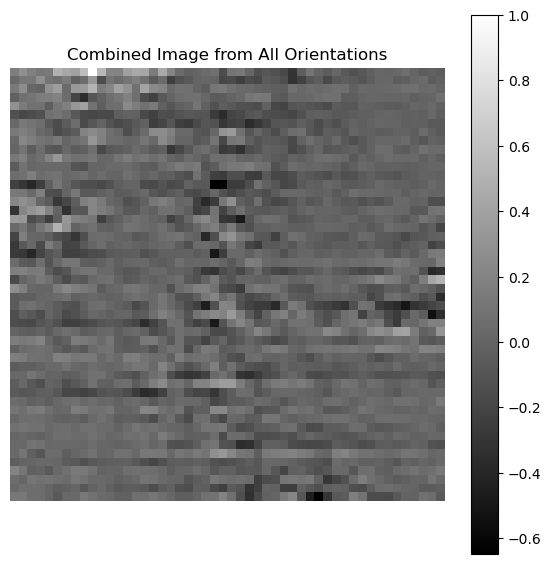

In [29]:
# Visualise the generated image
model.visualise(combined_fields2)

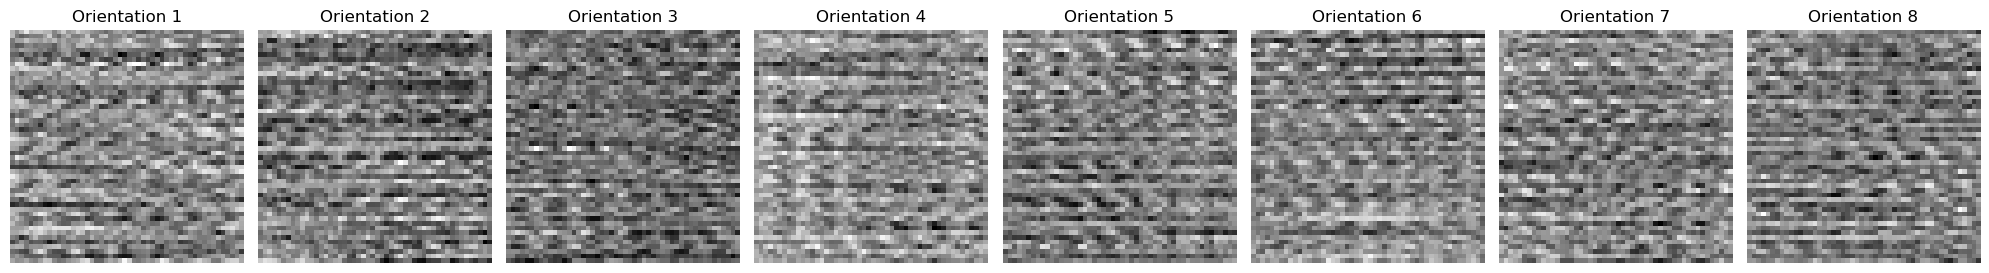

In [30]:
reshaped_feature_fields = features.reshape(8, grid_size, grid_size)

# Visualising each 10x10 grid for each orientation
fig, axes = plt.subplots(1, 8, figsize=(20, 5))
for i in range(8):
    ax = axes[i]
    ax.imshow(reshaped_feature_fields[i], cmap='gray')
    ax.set_title(f'Orientation {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()